In [39]:
%pylab inline
from serial.tools.list_ports import comports, grep
import serial
import time
import winsound


Populating the interactive namespace from numpy and matplotlib


In [2]:
[(j.device, j.hwid, j.vid, j.description, j.manufacturer) for j in comports()] #list comprehension

[(u'COM3',
  'USB VID:PID=2A03:003D SER=75430333137351E03132 LOCATION=1-2',
  10755,
  u'Arduino Due Programming Port (COM3)',
  u'Arduino Srl (www.arduino.org)')]

In [3]:
portlist = [j.device for j in comports() if j.description==u'Arduino Due Programming Port (COM3)']
assert len(portlist)==1
thisport = portlist[0]

In [4]:
#help command
with serial.Serial(thisport, timeout=1, baudrate=115200) as s:
    time.sleep(10) #give it time to start
    print "done"
    print "initial:",s.readline() #Bridge 12 MPS Started
    s.write("help\r") #command for "help"
    time.sleep(4) #time to process
    print "after help:",s.read_all() #read help 

done
initial: Bridge12 MPS Started

after help: 
Serial Commands Help

Command examples
Set Frequency:
freq <frequency in kHz>

Query Frequency:
freq?


Set Power Level:
power <level in dBm * 10>

Query Frequency:
power?


For a complete list see the manual



In [ ]:
#freq query test
with serial.Serial(thisport, timeout=1, baudrate=115200) as s:
    time.sleep(10)
    print "done"
    winsound.Beep(1000,300)
    s.write('freq?\r')
    print float(s.readline())
print "final"

In [ ]:
#frequency test
with serial.Serial(thisport, timeout=1, baudrate=115200) as s:
    time.sleep(10)
    print "done"
    winsound.Beep(1000,300)
    for freq in linspace(9.45e9,9.51e9,11):
        time.sleep(0.5)
        winsound.Beep(500,300)
        s.write('freq %.1f\r'%(freq/1e3))
    winsound.Beep(1000,300)
    time.sleep(5)
    print "final:", s.read_all()

In [36]:
#preliminary code for ampstatus and freq (no need to run):
with serial.Serial(thisport, timeout=1, baudrate=115200) as s:
    time.sleep(10) 
    print "done"
    print "initial:",s.readline()
    s.write('ampstatus 0\r') #command amp to be OFF
    s.write('ampstatus?\r') #command to check amp status (ON/OFF)
    amp_status = int(s.readline()) #read amp status as an integer
    print "amp status:",amp_status #print amp status 
    winsound.Beep(1000, 300) #signal to begin running through frequencies
    for mw_freq in linspace(9.45e9,9.51e9,11): #frequencies being ran through 
        time.sleep(0.5) #time between frequencies
        winsound.Beep(500, 300) #signal frequency change
        s.write('freq %.1f\r'%(mw_freq/1e3)) #changing frequency values to a string for Bridge12 to read
    winsound.Beep(1000, 300) #signal when finished running through frequencies
    time.sleep(5) #time to process
    print "final:",s.read_all() #print any values coming out from "with" loop

done
initial: Bridge12 MPS Started

amp status: 1
after freq: 


In [42]:
for mw_freq in linspace(9.5e9,9.51e9,11):
    print 'freq %.1f\r'%(mw_freq/1e3) #printing

freq 9500000.0
freq 9501000.0
freq 9502000.0
freq 9503000.0
freq 9504000.0
freq 9505000.0
freq 9506000.0
freq 9507000.0
freq 9508000.0
freq 9509000.0
freq 9510000.0


In [21]:
#just checking to see if sounds work
import winsound
duration = 1000  # millisecond
freq = 440  # Hz
winsound.Beep(880, 300)

In [33]:
result = '30.0'
result = float(result) #changes string to a float (regular number)
result + 1

31.0

In [41]:
for j,f in enumerate(linspace(0,1,10)): #enumerate is for (answer after reading)
    print 'j is',j
    print f



j is 0
0.0
j is 1
0.111111111111
j is 2
0.222222222222
j is 3
0.333333333333
j is 4
0.444444444444
j is 5
0.555555555556
j is 6
0.666666666667
j is 7
0.777777777778
j is 8
0.888888888889
j is 9
1.0


initial: Bridge12 MPS Started

amp status: 0
final: 
j 49 freq 9900000000.0 rxpower [ 27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7
  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7
  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7
  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7  27.7
  27.7  27.7]


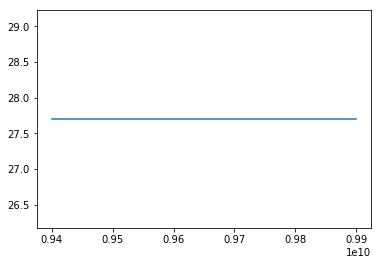

In [40]:
#use this block for the tuning curve:
freq = linspace(9.4e9,9.9e9, 50)
rxvalues = zeros(len(freq))
with serial.Serial(thisport, timeout=1, baudrate=115200) as s:
    time.sleep(10)
    print "initial:",s.readline()
    #ampstatus commands
    s.write('ampstatus 0\r')
    time.sleep(0.5)
    s.write('ampstatus?\r')
    amp_status = int(s.readline())
    print "amp status:",amp_status
    time.sleep(5)
    winsound.Beep(1000,300)
    #frequency and rxpower
    for j,f in enumerate(freq):
        time.sleep(0.5)
        winsound.Beep(500, 300)
        s.write('freq %.1f\r'%(f/1e3)) #frequencies are now defined as f, NOT mw_freq
        s.write('rxpowerdbm?\r') 
        rx =s.readline()
        rxvalues[j] = float(rx)/10 #converting string to float point values
    winsound.Beep(1000, 300)
    time.sleep(5)
    print "final:",s.read_all()
print "j",j, "freq",f, "rxpower", rxvalues #'table' of values
plot(freq, rxvalues) #tuning curve

In [ ]:
#another option for tuning curve (with sound):
freq = linspace(9.4e9,9.9e9, 50)
rxvalues = zeros(len(freq))
txvalues = zeros(len(freq))
with serial.Serial(thisport, timeout=1, baudrate=115200) as s:
    time.sleep(10) 
    print "done."
    print "initial:",s.readline()
    s.write('power?\r')
    check_set_power = float(s.readline())/10.
    print "power is set to",check_set_power
    s.write('ampstatus 0\r') #command amp to be OFF
    s.write('ampstatus?\r') #command to check amp status (ON/OFF)
    amp_status = int(s.readline()) #read amp status as an integer
    print "amp status:",amp_status #print amp status 
    s.write('rfstatus?\r') #command to check rf status (ON/OFF)
    rf_status = int(s.readline()) #read rf status as an integer
    print "rf status:",rf_status #print amp status 
    s.write('wgstatus 1\r') #switch to DNP mode
    s.read_all()
    #s.write('wgstatus?\r') #check wg status
    #wg_status1= int(s.readline()) #read wg status as an integer
    #print "wg status1:", wg_status1 #print wg status
    winsound.Beep(1000,300)
    set_power = 10.0
    s.write('power %d\r'%(round(set_power*10)))
    s.write('power?\r')
    check_set_power = float(s.readline())/10.
    print "power is set to",check_set_power
    winsound.Beep(1000, 300) #signal to begin running through frequencies
    for j,f in enumerate(freq):
        time.sleep(0.5) #time between frequencies
        winsound.Beep(500, 300) #signal frequency change
        s.write('freq %.1f\r'%(mw_freq/1e3)) #changing frequency values to a string for Bridge12 to read
        s.write('rxpowerdbm?\r')
        rxvalues[j]=float(s.readline())
        s.write('txpowerdbm?\r')
        txvalues[j]=float(s.readline())
    winsound.Beep(1000, 300) #signal when finished running through frequencies
    time.sleep(5) #time to process
    s.write('wgstatus 0\r')
    #s.write('wgstatus?\r')
    #wg_status0 = int(s.readline())
    print "wg status0:", wg_status0
    print "final:",s.read_all() #print any values coming out from "with" loop
plot(freq, rxvalues, alpha=0.5, label='Rx')
plot(freq, txvalues, alpha=0.5, label='Tx')
legend()

In [53]:
with serial.Serial(thisport, timeout=1, baudrate=115200) as s:
    s.read_until('Started\r\n') #read this instead of time sleep
    s.write('power 0\r')
    time.sleep(10)

In [66]:
with serial.Serial(thisport, timeout=1, baudrate=115200) as s:
    s.read_until('Started\r\n')
    #s.write('power 100\r')
    for j in range(10):
        time.sleep(5)
        s.write('wgstatus?\r')
        print "wgstatus:",repr(s.readline())
    #print "power:", int(s.readline())

wgstatus: ''
wgstatus: 'ERROR\r\n'
wgstatus: 'ERROR\r\n'
wgstatus: 'ERROR\r\n'
wgstatus: 'ERROR\r\n'
wgstatus: 'ERROR\r\n'
wgstatus: 'ERROR\r\n'
wgstatus: 'ERROR\r\n'
wgstatus: 'ERROR\r\n'
wgstatus: 'ERROR\r\n'


In [54]:
9.505e9/1e3

9505000.0

In [59]:
with serial.Serial(thisport, timeout=1, baudrate=115200) as s:
    s.read_until('Started\r\n')
    time.sleep(10)
    winsound.Beep(700,300)
    s.write('freq 9505000.0/r')
    winsound.Beep(500,300)
print "done"

done


In [ ]:
with serial.Serial(thisport, timeout=1, baudrate=115200) as s:
    s.read_until('Started\r\n')
    s.write('power 0\r')
    s.write('power?\r')
    print "power:", int(s.readline())
    winsound.Beep(1000,300)
    s.write('rfstatus 1\r')
    s.write('rfstatus?\r')
    print "rfstatus:", int(s.readline())
    winsound.Beep(1000,300)
    time.sleep(10)
print "done"

In [ ]:
with serial.Serial(thisport, timeout=1, baudrate=115200) as s:
    s.read_until('Started\r\n')
    s.write('power 0\r')
    s.write('power?\r')
    print "power:", int(s.readline())
    winsound.Beep(1000,300)
    time.sleep(5)
    s.write('wgstatus 1\r')
    s.write('wgstatus?\r')
    print "wgstatus:", int(s.readline())
    winsound.Beep(1000,300)
    time.sleep(5)
    s.write('ampstatus 1\r')
    s.write('ampstatus?\r')
    print "ampstatus:", int(s.readline())
    winsound.Beep(1000,300)
    time.sleep(5)
    s.write('rfstatus 1\r')
    s.write('rfstatus?\r')
    print "rfstatus:", int(s.readline())
    winsound.Beep(1000,300)
    time.sleep(10)
    s.write('rfstatus 0\r')
    s.write('rfstatus?\r')
    print "rfstatus:" int(s.readline)
    s.write('ampstatus 0\r')
    s.write('ampstatus?\r')
    print "ampstatus:" int(s.readline())
print "done"

In [ ]:
freq = linspace(9.845e9,9.855e9, 50)
rxvalues = zeros(len(freq))
with serial.Serial(thisport, timeout=1, baudrate=115200) as s:
    s.read_untill('Started\r\n')
    s.write('power 100\r')
    s.write('power?\r')
    print "power:", int(s.readline())
    winsound.Beep(1000,300)
    time.sleep(5)
    s.write('wgstatus 1\r')
    s.write('wgstatus?\r')
    print "wgstatus:", int(s.readline())
    winsound.Beep(1000,300)
    time.sleep(5)
    s.write('ampstatus 1\r')
    s.write('ampstatus?\r')
    print "ampstatus:", int(s.readline())
    winsound.Beep(1000,300)
    time.sleep(5)
    s.write('rfstatus 1\r')
    s.write('rfstatus?\r')
    print "rfstatus:", int(s.readline())
    winsound.Beep(1000,300)
    for j, f in enumerate(freq): 
        time.sleep(0.5) 
        winsound.Beep(500, 300) 
        s.write('freq %.3f\r'%(freq/1e3)) 
        s.write('rxpowerdbm?\r')
        rxvalues[j]=float(s.readline())
    winsound.Beep(1000,300)
    time.sleep(5)
    s.write('rfstatus 0\r')
    s.write('rfstatus?\r')
    print "rfstatus:", int(s.readline())
    winsound.Beep(1000,300)
    time.sleep(5)
    s.write('ampstatus 0\r')
    s.write('ampstatus?\r')
    print "ampstatus:", int(s.readline())
    winsound.Beep(1000,300)
    time.sleep(5)
    s.write('power 0\r')
    s.write('power?\r')
    print "power:", int(s.readline())
    winsound.Beep(1000,300)
    time.sleep(5)
plot(freq, rxvalues, alpha=1.0, label='Rx')
legend()
